In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
organ = "liver"
# organ = "heart"
# organ = "muscle"
# organ = "kidney"

Load data
===

In [3]:
path= '../data/alignment/'+organ
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            

data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])       

    data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])    

print(data.shape)
data=data[data.NDP >=4]
print(data.shape)

(27307, 31)
(26486, 31)


In [4]:
print("Rsquared >= 95 \t Original d2ome =",data[data.old_Rsquared>=0.95].shape[0]/data.shape[0])
print("Rsquared >= 90 \t Original d2ome =",data[data.old_Rsquared>=0.9].shape[0]/data.shape[0])
print("Rsquared >= 80 \t Original d2ome =", data[data.old_Rsquared>=0.8].shape[0]/data.shape[0])
print("Rsquared >= 75 \t Original d2ome =",data[data.old_Rsquared>=0.75].shape[0]/data.shape[0])


Rsquared >= 95 	 Original d2ome = 0.2565506305217851
Rsquared >= 90 	 Original d2ome = 0.3880163105036623
Rsquared >= 80 	 Original d2ome = 0.5111002038812957
Rsquared >= 75 	 Original d2ome = 0.5483651740542174


In [5]:
print("Rsquared >= 95 \t Original d2ome =",data[data.old_Rsquared>=0.95].shape[0])
print("Rsquared >= 90 \t Original d2ome =",data[data.old_Rsquared>=0.9].shape[0])
print("Rsquared >= 80 \t Original d2ome =", data[data.old_Rsquared>=0.8].shape[0])
print("Rsquared >= 75 \t Original d2ome =",data[data.old_Rsquared>=0.75].shape[0])
print("Rsquared <= 75 \t Original d2ome =",data[data.old_Rsquared<=0.75].shape[0])

Rsquared >= 95 	 Original d2ome = 6795
Rsquared >= 90 	 Original d2ome = 10277
Rsquared >= 80 	 Original d2ome = 13537
Rsquared >= 75 	 Original d2ome = 14524
Rsquared <= 75 	 Original d2ome = 11962


In [6]:
alignmentdata=[data[data.old_Rsquared>=0.95].shape[0],data[data.old_Rsquared>=0.9].shape[0], data[data.old_Rsquared>=0.8].shape[0],
data[data.old_Rsquared>=0.75].shape[0],data[data.old_Rsquared<=0.75].shape[0]]

In [7]:
path= '../data/no_alignment/'+organ
filelist=os.listdir(path)
filelist.remove("compare.csv")
proteinlist= []
for p in filelist:
    if p.endswith(".csv"):
        proteinlist.append(p)            

data=pd.DataFrame()
for  p in proteinlist:
    d=pd.read_csv(os.path.join(path,p))
    d["Protein"]=p.replace('.csv','')
    data=pd.concat([data,d])       

    data["diff"]= abs(data["old_Rsquared"] - data["new_Rsquared"])    

print(data.shape)
data=data[data.NDP >=4]
print(data.shape)

(27307, 31)
(19932, 31)


In [8]:
print("Rsquared >= 95 \t Original d2ome =",data[data.old_Rsquared>=0.95].shape[0])
print("Rsquared >= 90 \t Original d2ome =",data[data.old_Rsquared>=0.9].shape[0])
print("Rsquared >= 80 \t Original d2ome =", data[data.old_Rsquared>=0.8].shape[0])
print("Rsquared >= 75 \t Original d2ome =",data[data.old_Rsquared>=0.75].shape[0])
print("Rsquared <= 75 \t Original d2ome =",data[data.old_Rsquared<=0.75].shape[0])

Rsquared >= 95 	 Original d2ome = 6120
Rsquared >= 90 	 Original d2ome = 9024
Rsquared >= 80 	 Original d2ome = 11612
Rsquared >= 75 	 Original d2ome = 12321
Rsquared <= 75 	 Original d2ome = 7611


In [9]:
no_alignmentdata=[data[data.old_Rsquared>=0.95].shape[0],data[data.old_Rsquared>=0.9].shape[0], data[data.old_Rsquared>=0.8].shape[0],
data[data.old_Rsquared>=0.75].shape[0],data[data.old_Rsquared<=0.75].shape[0]]

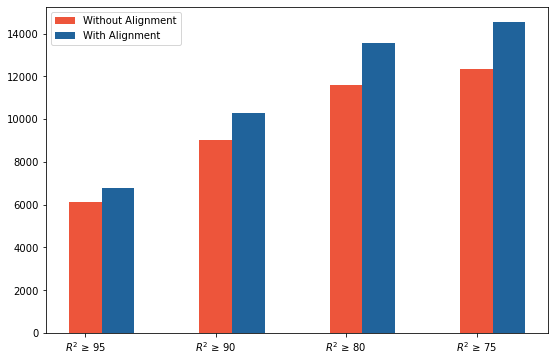

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(9,6))
bar_width = 0.25
index=np.array([0,1,2,3])

# '#3CAEA3','#F6D55C','#ED553B','#20639b'

plt.bar(index,no_alignmentdata[:-1],bar_width, label= "Without Alignment" ,color='#ED553B') #ED553B
# plt.bar(index+bar_width,noAlin,bar_width, label= "With Zero Ionscore",color='#F6D55C')
plt.bar(index+bar_width,alignmentdata[:-1],bar_width, label="With Alignment",color='#20639b')

plt.xticks([0,1,2,3],[r'$R^2$ ≥ 95',r'$R^2$ ≥ 90',r'$R^2$ ≥ 80',r'$R^2$ ≥ 75'])
plt.legend()

plt.savefig(f"{organ}.jpeg",dpi=900, bbox_inches = "tight")

In [11]:
np.array(no_alignmentdata)#/27307

array([ 6120,  9024, 11612, 12321,  7611])

In [12]:
np.array(alignmentdata)#/27307

array([ 6795, 10277, 13537, 14524, 11962])

In [13]:
100*(6795-6120)/6120

11.029411764705882